In [1]:
import pandas as pd
import numpy as np
import shap
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Load the dataset
data = pd.read_csv("human_annotations_same.csv")  
data = data.rename(columns={'human_label1': 'feelLonely'}).drop('human_label2', axis=1)

# Select relevant columns
data = data[["text", "feelLonely"]]

# Write the modified data to the CSV file
data.to_csv('human_annotations_same1.csv', index=False)

In [3]:
# Preprocessing
# Text vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data["text"])
y = data["feelLonely"]

# Split the dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [4]:
# Create the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

LogisticRegression()

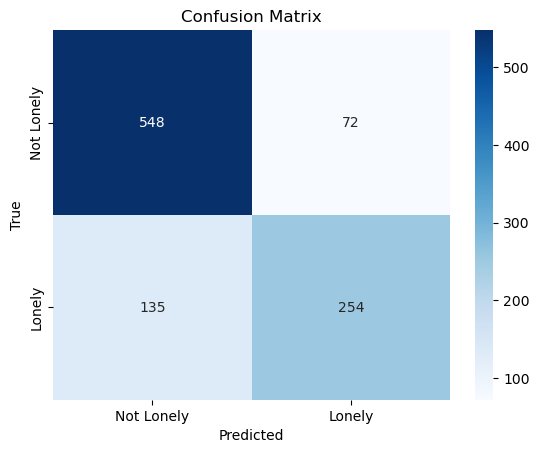

In [7]:
# Predict probabilities for the test set
y_pred_probs = model.predict(X_test.toarray())

# Convert probabilities to class labels
y_pred = np.round(y_pred_probs).flatten()

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=["Not Lonely", "Lonely"], yticklabels=["Not Lonely", "Lonely"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [8]:
# Calculate classification metrics
classification_metrics = classification_report(y_test, y_pred)

# Print the classification metrics
print(classification_metrics)

              precision    recall  f1-score   support

         0.0       0.80      0.88      0.84       620
         1.0       0.78      0.65      0.71       389

    accuracy                           0.79      1009
   macro avg       0.79      0.77      0.78      1009
weighted avg       0.79      0.79      0.79      1009

